## Importando os módulos necessários

In [1]:
#Importing the modules
import pandas as pd
import numpy as np

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
import pickle

import shap

## Subindo e upando os dados

In [12]:
dados = pd.read_csv('Energia_isolationForest.csv')
dados = dados.drop('anomaly',axis=1)
dados.head()

,L_501,L_503,L_511C,L_511R,L_512,L_521,L_551,L_561,L_562,Trasfega,Filtracao,Brassagem,Energia
0,0.00,0.000,2384.407,0.0,3020.924,0.0,0.000,0.00,0.00,10397,14865.0,17563.8,102784.59
1,0.00,0.000,1621.611,0.0,6076.104,170.8,0.000,2640.00,0.00,12859,3640.0,13985.4,115752.86
2,1407.75,2241.603,2118.966,0.0,2748.683,623.9,202.032,3868.92,441.96,11091,11693.0,12221.7,139420.40
3,2804.25,2814.027,3680.043,0.0,3817.594,35.4,0.000,271.20,1186.14,6238,0.0,14022.1,130246.60
4,3393.75,0.000,4069.322,0.0,6866.077,0.0,0.000,1642.08,797.52,3204,12852.0,12318.0,125788.40


In [13]:
#Calculando a média e o desvio padrão do energia
m=np.mean(dados['Energia'])
d=np.std(dados['Energia'])
a = (m+2*d)
b = m-2*d
c =dados['Energia'].max()
d =dados['Energia'].min()
print(a,b,c,d)

179638.4363199379 75572.33414570082 164749.0 25734.0


In [5]:
'''
dados.drop(dados[dados.Energia >a].index, inplace=True)
dados.drop(dados[dados.Energia <b].index, inplace=True)
dados_tratados = dados
dados_tratados.count()
'''

'\ndados.drop(dados[dados.Energia >a].index, inplace=True)\ndados.drop(dados[dados.Energia <b].index, inplace=True)\ndados_tratados = dados\ndados_tratados.count()\n'

In [14]:
X = dados.drop('Energia', axis=1)
y= dados['Energia']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

regressor = RandomForestRegressor(n_estimators = 500, random_state = 0, max_depth=10)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


(array([ 3.,  0.,  0.,  0.,  5.,  7., 11., 28., 30., 30.]),
 array([ 34432.57115643,  46500.25400496,  58567.93685349,  70635.61970202,
         82703.30255055,  94770.98539908, 106838.66824761, 118906.35109614,
        130974.03394467, 143041.71679319, 155109.39964172]),
 <BarContainer object of 10 artists>)

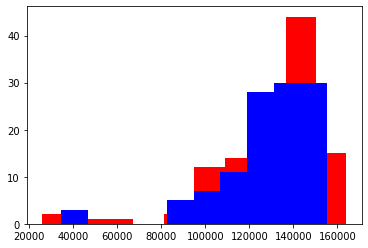

In [15]:

df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df
plt.hist(y_test, color ='r')
plt.hist(y_pred, color ='b')

In [16]:
#Métricas do modelo

# Erro absoluto
errors = abs(y_pred - y_test)
error_rf = round(np.mean(errors), 2)
mape = 100 * (errors / y_test)

# Acurácia
accuracy_rf = 100 - np.mean(mape)
accuracy_rf = round(accuracy_rf, 2)

#Erros
MeanSquaredError = metrics.mean_squared_error(y_test,y_pred)
RootMeanSquaredError = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

#Dicionario com a metricas do modelo
Resultados = {
"Erro_Absoluto": error_rf,
"Acuracia_RandomForest": accuracy_rf,
"Erro_Medio_Quadrado": MeanSquaredError,
"RSME": RootMeanSquaredError,
}
print(Resultados)
print(mape.mean())

{'Erro_Absoluto': 6941.52, 'Acuracia_RandomForest': 94.02, 'Erro_Medio_Quadrado': 76364633.85598345, 'RSME': 8738.686048599266}
5.984560300456667


## Plotando a importância das features com SHAP

In [21]:
#Guardando os nomes das features em uma lista
comentarios = list(dados)
comentarios.remove(comentarios[12])
print(comentarios[0])

L_501


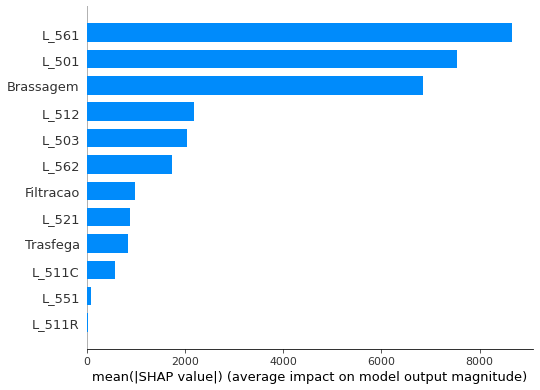

In [18]:
#Plotando a importância das features
shap_values = shap.Explainer(regressor).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar",feature_names=comentarios,show=False)
plt.savefig('barPlot.png')

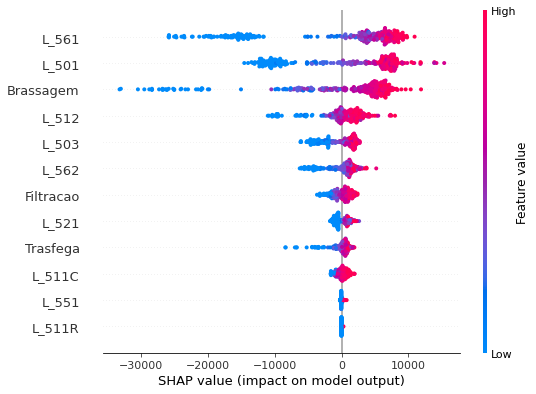

In [19]:
#Plotando como as features impactam o consumo de CO2
f = plt.figure()
shap.summary_plot(shap.TreeExplainer(regressor).shap_values(X_train), X_train,feature_names=comentarios,show=False)
plt.savefig('summaryPlot.png')

100%|===================| 339/340 [00:21<00:00]        

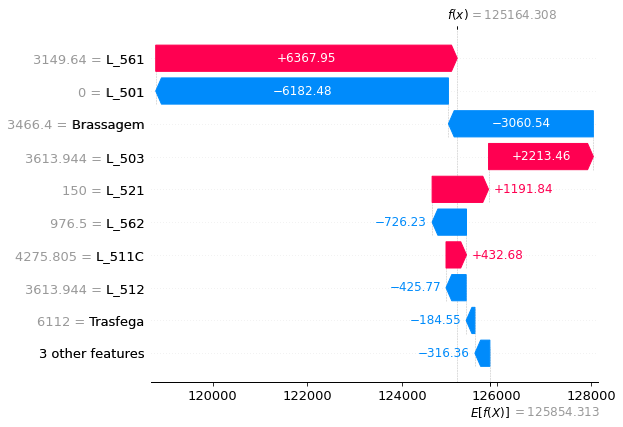

In [20]:
#Plotando o Waterfall para análise
explainer = shap.Explainer(regressor, X_train)
shap_values = explainer(X_train)
shap.plots.waterfall(shap_values[np.random.randint(0,200)],show=False)
plt.savefig('waterfallPlot.png')

In [30]:
m = np.array([0,0,0,0,0,0,0,0,0,0,0,0])
m = m.reshape(1, -1)
regressor.predict(m)


array([95884.96189022])